In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression, mutual_info_regression, mutual_info_classif
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

%matplotlib inline

In [3]:
from mll_calc.mll_pred import format_XY

In [107]:
pklfile = '~/sims_n_results/simupdates_aug2020/not-scaled_nuc29.pkl'
XY = format_XY(pklfile)
lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
nonlbls = ['AvgPowerDensity', 'ModDensity', 'UiWeight']

X = XY.drop(lbls+nonlbls, axis=1)
cols = X.columns.tolist()
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=cols)

In [108]:
X.head()

,am241,am242m,am243,cm242,cm244,cs134,cs137,eu154,nd143,nd144,...,pu242,sm147,sm149,sm150,sm151,sm152,u234,u235,u236,u238
0,-1.031111,-0.93134,-0.733171,-0.289402,-0.541983,-0.462175,-1.319755,-0.919641,-1.672935,-1.209875,...,-0.928005,-1.621234,-2.149715,-1.328397,-1.844042,-1.656985,1.377342,-0.572735,-1.351142,2.011815
1,-1.031108,-0.93134,-0.733171,-0.289395,-0.541983,-0.462177,-1.319755,-0.919642,-1.672335,-1.209838,...,-0.928005,-1.621195,-2.101631,-1.328397,-1.838771,-1.656985,1.377342,-0.572735,-1.351142,2.011815
2,-1.031106,-0.93134,-0.733171,-0.289392,-0.541983,-0.462179,-1.319755,-0.919643,-1.671969,-1.209815,...,-0.928005,-1.621170,-2.074467,-1.328397,-1.836275,-1.656985,1.377342,-0.572735,-1.351142,2.011815
3,-1.031070,-0.93134,-0.733171,-0.289394,-0.541983,-0.462207,-1.319788,-0.919651,-1.665937,-1.209414,...,-0.928005,-1.620717,-1.863072,-1.328397,-1.824068,-1.656985,1.377342,-0.572735,-1.351142,2.011815
4,-1.030949,-0.93134,-0.733171,-0.289424,-0.541983,-0.462308,-1.319854,-0.919680,-1.654174,-1.208080,...,-0.928005,-1.619036,-1.818492,-1.328397,-1.823791,-1.656985,1.377342,-0.572735,-1.351142,2.011815


# Feature Distrubitions

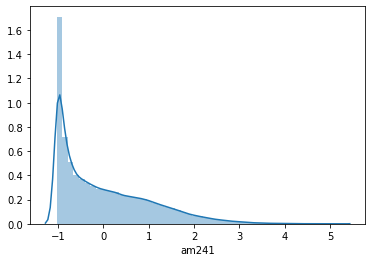

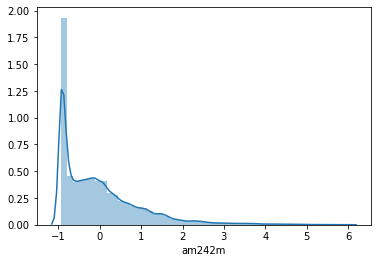

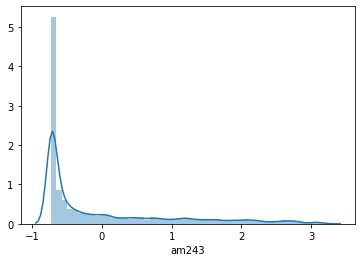

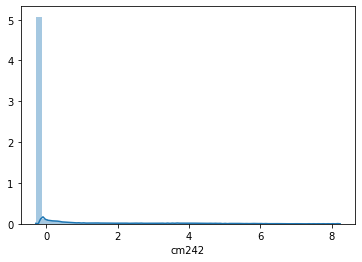

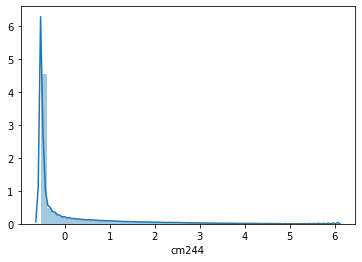

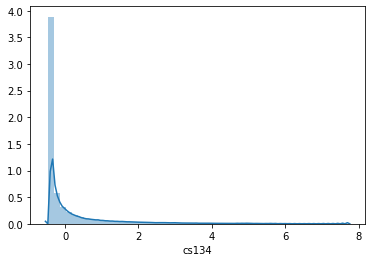

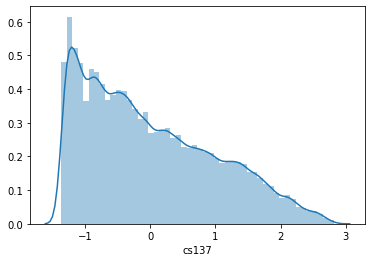

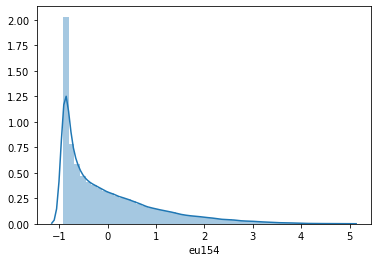

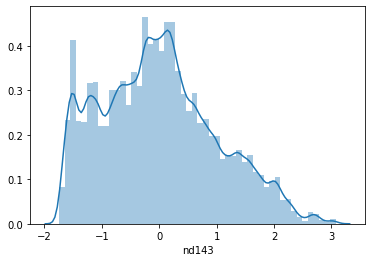

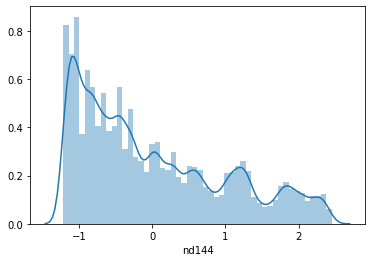

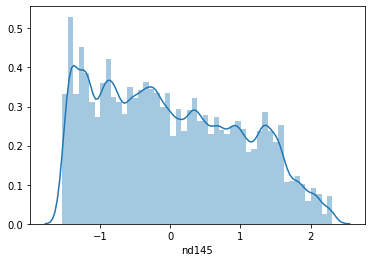

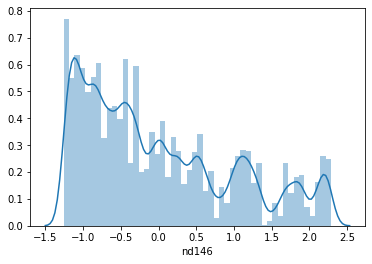

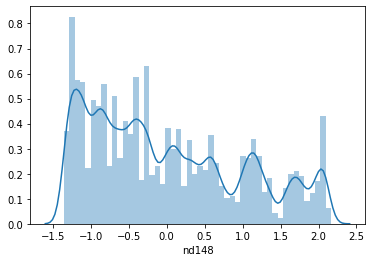

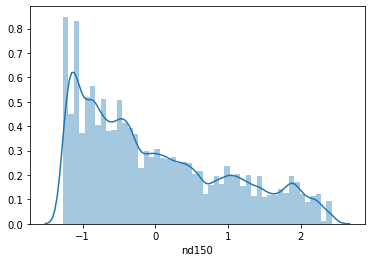

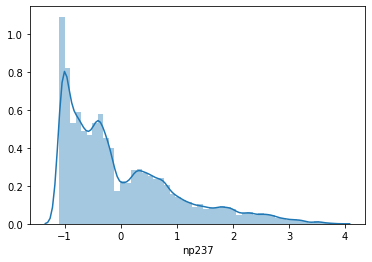

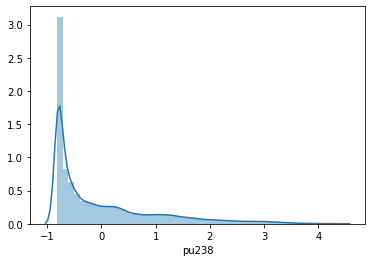

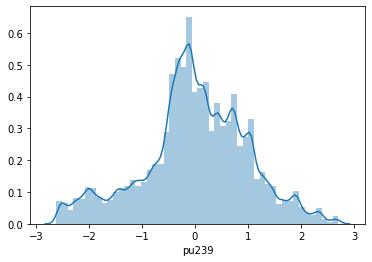

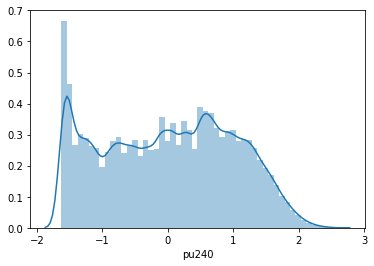

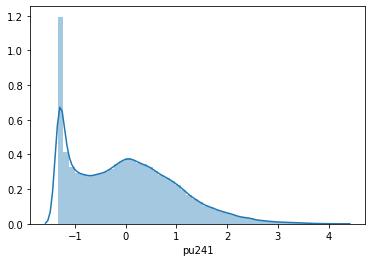

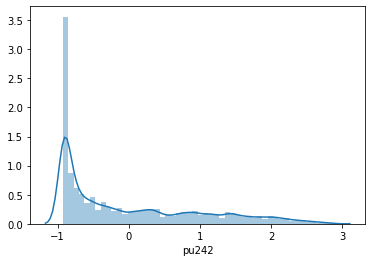

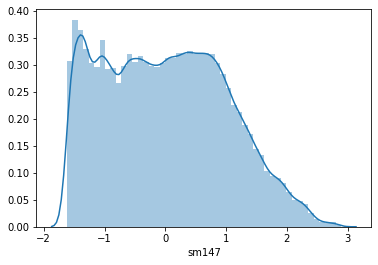

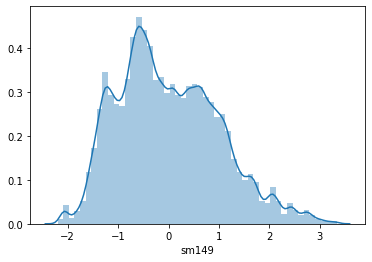

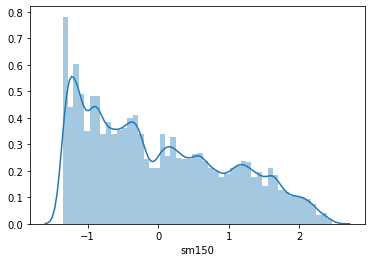

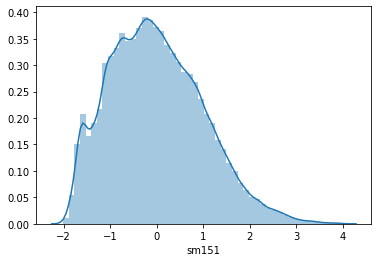

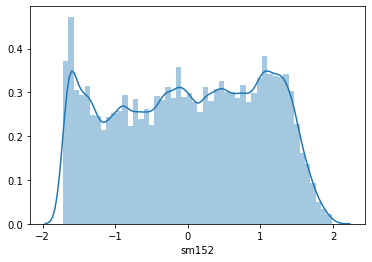

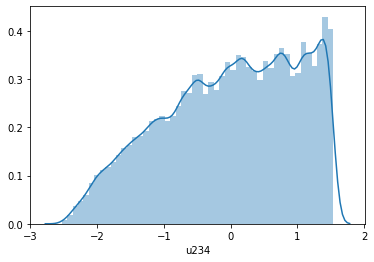

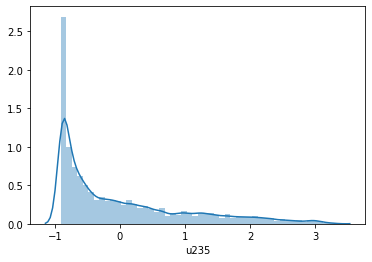

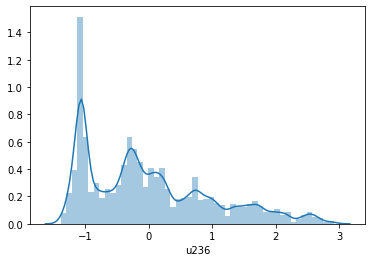

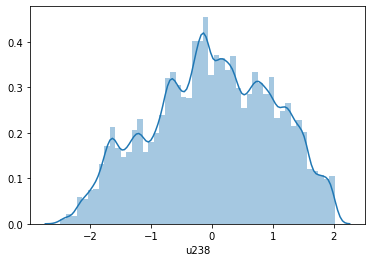

In [109]:
for iso in X.columns.tolist():
    sns.distplot(X[iso])
    plt.show()

# Feature Selection
## Using Decision Trees (Model-based Feature Importance)

In [110]:
burn = XY['Burnup']
rxtr = XY['ReactorType']
cool = XY['CoolingTime']
enri = XY['Enrichment']

In [111]:
dtree_burn = ExtraTreesRegressor(n_estimators=10)#DecisionTreeRegressor()
dtree_rxtr = ExtraTreesClassifier(n_estimators=10)#DecisionTreeClassifier()
dtree_cool = ExtraTreesRegressor(n_estimators=10)#DecisionTreeRegressor()
dtree_enri = ExtraTreesRegressor(n_estimators=10)#DecisionTreeRegressor()

In [112]:
dtree_burn.fit(X,burn)
burn_tree_impt = pd.Series(dtree_burn.feature_importances_, index=X.columns)

In [113]:
dtree_rxtr.fit(X,rxtr)
rxtr_tree_impt = pd.Series(dtree_rxtr.feature_importances_, index=X.columns)

In [114]:
dtree_cool.fit(X,cool)
cool_tree_impt = pd.Series(dtree_cool.feature_importances_, index=X.columns)

In [115]:
dtree_enri.fit(X,enri)
enri_tree_impt = pd.Series(dtree_enri.feature_importances_, index=X.columns)

## Using Select KBest (Univariate Feature Selection)

In [116]:
bestfeatures_f_burn = SelectKBest(score_func=f_regression, k=29)
bestfeatures_f_cool = SelectKBest(score_func=f_regression, k=29)
bestfeatures_f_enri = SelectKBest(score_func=f_regression, k=29)
bestfeatures_fclass = SelectKBest(score_func=f_classif, k=29)
bestfeatures_chi = SelectKBest(score_func=chi2, k=29)

In [117]:
kbest_f_burn = bestfeatures_f_burn.fit(X,burn)
burn_f_scores = pd.Series(kbest_f_burn.scores_, index=X.columns)

In [119]:
kbest_f_rxtr = bestfeatures_fclass.fit(X,rxtr)
rxtr_f_scores = pd.Series(kbest_f_rxtr.scores_, index=X.columns)

In [120]:
kbest_f_cool = bestfeatures_f_cool.fit(X,cool)
cool_f_scores = pd.Series(kbest_f_cool.scores_, index=X.columns)

In [121]:
kbest_f_enri = bestfeatures_f_enri.fit(X,enri)
enri_f_scores = pd.Series(kbest_f_enri.scores_, index=X.columns)

## Results 
#### (Grouped by feature selection type)

In [122]:
n = 7

In [123]:
def get_isos(feats_list):
    nlargest = [x.nlargest(n) for x in feats_list]
    idx_list = [x.index.tolist() for x in nlargest]
    isos = list(set([x for sublist in idx_list for x in sublist]))
    isos.sort()
    return isos

In [124]:
dtree_list = [burn_tree_impt, rxtr_tree_impt, cool_tree_impt, enri_tree_impt]
dtree_isos = get_isos(dtree_list)
print(len(dtree_isos), dtree_isos)

23 ['am241', 'cm242', 'cs134', 'cs137', 'eu154', 'nd143', 'nd144', 'nd146', 'nd148', 'nd150', 'np237', 'pu238', 'pu239', 'pu240', 'pu241', 'sm147', 'sm149', 'sm150', 'sm151', 'sm152', 'u235', 'u236', 'u238']


In [125]:
kbest_list = [burn_f_scores, rxtr_f_scores, cool_f_scores, enri_f_scores]
kbest_isos = get_isos(kbest_list)
print(len(kbest_isos), kbest_isos)

21 ['am241', 'cm242', 'cs134', 'cs137', 'eu154', 'nd143', 'nd144', 'nd145', 'nd146', 'nd148', 'nd150', 'pu239', 'pu241', 'sm147', 'sm149', 'sm150', 'sm151', 'u234', 'u235', 'u236', 'u238']


#### Intersection

In [126]:
intersection = list(set(dtree_isos) & set(kbest_isos))
intersection.sort()
print(len(intersection), intersection)

19 ['am241', 'cm242', 'cs134', 'cs137', 'eu154', 'nd143', 'nd144', 'nd146', 'nd148', 'nd150', 'pu239', 'pu241', 'sm147', 'sm149', 'sm150', 'sm151', 'u235', 'u236', 'u238']


#### Union

In [127]:
union = list(set(dtree_isos) | set(kbest_isos))
union.sort()
print(len(union), union)

25 ['am241', 'cm242', 'cs134', 'cs137', 'eu154', 'nd143', 'nd144', 'nd145', 'nd146', 'nd148', 'nd150', 'np237', 'pu238', 'pu239', 'pu240', 'pu241', 'sm147', 'sm149', 'sm150', 'sm151', 'sm152', 'u234', 'u235', 'u236', 'u238']


#### Difference of lists

In [128]:
diff = list(set(dtree_isos) ^ set(kbest_isos))
diff.sort()
diff

['nd145', 'np237', 'pu238', 'pu240', 'sm152', 'u234']

#### Difference of kbest from 29 list

In [129]:
diff = list(set(X.columns.tolist()) - set(kbest_isos))
diff.sort()
diff

['am242m', 'am243', 'cm244', 'np237', 'pu238', 'pu240', 'pu242', 'sm152']

#### Difference of dtree from 29 list

In [147]:
diff = list(set(X.columns.tolist()) - set(dtree_isos))
diff.sort()
diff

['am242m', 'am243', 'cm244', 'nd145', 'pu242', 'u234']

#### (Grouped by prediction type)

In [130]:
burn_list = [burn_tree_impt, burn_f_scores]
burn_isos = get_isos(burn_list)
burn_isos

['cs137',
 'nd144',
 'nd145',
 'nd146',
 'nd148',
 'nd150',
 'pu238',
 'sm150',
 'sm152']

In [131]:
rxtr_list = [rxtr_tree_impt, rxtr_f_scores]
rxtr_isos = get_isos(rxtr_list)
rxtr_isos

['am241', 'nd143', 'pu239', 'pu240', 'pu241', 'sm149', 'sm151', 'u236', 'u238']

In [132]:
cool_list = [cool_tree_impt, cool_f_scores]
cool_isos = get_isos(cool_list)
cool_isos

['am241', 'cm242', 'cs134', 'cs137', 'eu154', 'pu241', 'sm147']

In [133]:
enri_list = [enri_tree_impt, enri_f_scores]
enri_isos = get_isos(enri_list)
enri_isos

['nd143', 'np237', 'sm149', 'sm151', 'u234', 'u235', 'u236', 'u238']

### Plots, showing the above but with scores

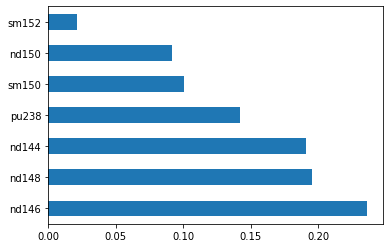

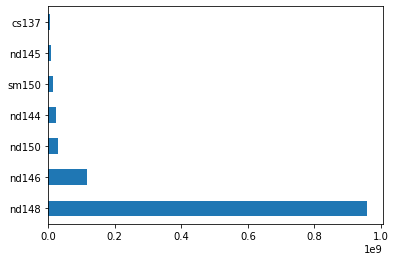

In [134]:
burn_tree_impt.nlargest(n).plot(kind='barh')
plt.show()
burn_f_scores.nlargest(n).plot(kind='barh')
plt.show()

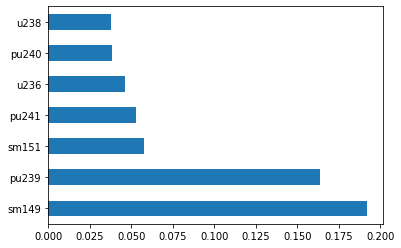

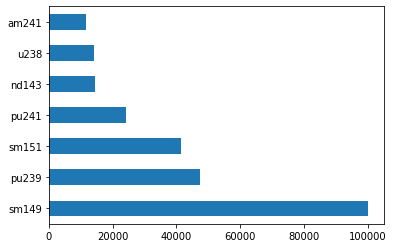

In [135]:
rxtr_tree_impt.nlargest(n).plot(kind='barh')
plt.show()
rxtr_f_scores.nlargest(n).plot(kind='barh')
plt.show()

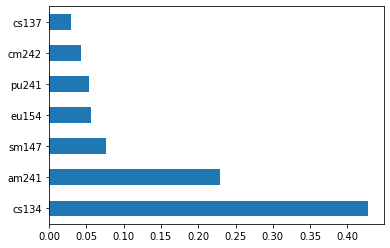

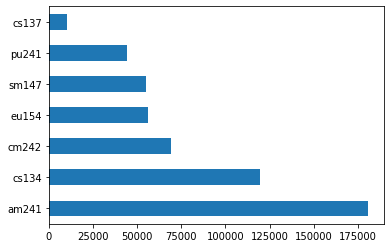

In [136]:
cool_tree_impt.nlargest(n).plot(kind='barh')
plt.show()
cool_f_scores.nlargest(n).plot(kind='barh')
plt.show()

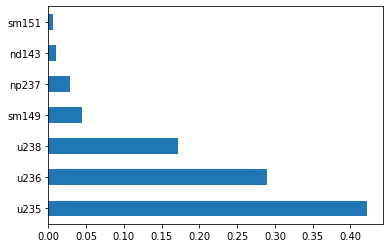

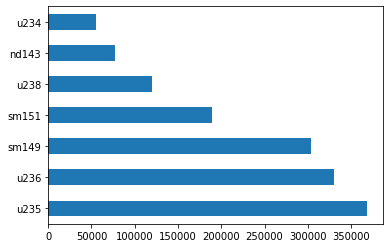

In [137]:
enri_tree_impt.nlargest(n).plot(kind='barh')
plt.show()
enri_f_scores.nlargest(n).plot(kind='barh')
plt.show()

# Principle Components 
### (Instead of Feature Selection)

In [138]:
pca = PCA(n_components=3)
pca_fit = pca.fit(X)

In [140]:
pca_fit.explained_variance_

array([19.66441756,  3.64377733,  2.33341056])

In [143]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [145]:
components_df = pd.DataFrame(pca_fit.components_, index=['component1', 'component2', 'component3'], columns=cols)

In [146]:
components_df.sort_values(by='component1', axis=1, ascending=False)

,sm150,nd148,nd145,nd146,cs137,nd150,nd144,sm152,pu238,np237,pu240,pu241,eu154,pu242,nd143,am243,am242m,sm147,pu239,sm151,cm244,am241,u236,cs134,cm242,sm149,u235,u238,u234
component1,0.223735,0.223180,0.222897,0.221367,0.221086,0.219642,0.218306,0.217428,0.205989,0.199760,0.199685,0.196926,0.195949,0.195295,0.193688,0.186373,0.178864,0.178697,0.171842,0.171415,0.160681,0.144615,0.136750,0.113558,0.069809,0.050026,-0.123694,-0.194363,-0.194931
component2,0.015886,0.036790,-0.054556,0.044043,0.058675,0.087453,0.048791,0.048486,-0.006814,-0.182124,0.147331,0.007013,0.102087,0.225049,-0.246255,0.234369,-0.129823,-0.183514,-0.227473,-0.281265,0.272961,-0.144351,-0.374263,0.173930,0.149058,-0.375239,-0.259883,0.150973,-0.213625
component3,-0.030492,-0.044936,-0.022683,-0.043982,0.070510,-0.060379,-0.090985,-0.077373,-0.002585,0.027829,-0.130511,0.199047,0.264676,-0.103617,0.042260,-0.085393,-0.005877,-0.260977,0.037092,0.164890,0.021087,-0.395378,0.096219,0.501287,0.500705,0.136316,0.183629,-0.064918,0.056333
